In [1]:
import pickle 
import re
import numpy as np
with open('Pickle_Files/user_dict_train.pickle', 'rb') as handle:
    user_dict_train = pickle.load(handle)
with open('Pickle_Files/user_dict_test.pickle', 'rb') as handle1:
    user_dict_test = pickle.load(handle1)
with open('Pickle_Files/user_dict_total.pickle', 'rb') as handle2:
    user_dict_total = pickle.load(handle2)
#loading dist_user
import numpy as np
dist_user=np.loadtxt('dist_user').view(float)

with open ('Pickle_Files/user_filepaths', 'rb') as fp:
    filepaths = pickle.load(fp)
print(len(filepaths))
users=[re.sub(r'\.txt$','',filename) for filename in filepaths]
print(users[0:9])


705
['100306237', '1005383936', '1009689475', '1017189240', '104048643', '1049020446', '1050455592', '105498404', '1057244852']


In [2]:
#NEED TO IMPORT SELECTED USERS AND RATINGS
selected_users=[]
"""selected_ratings=[3, 4, 2, 3, 3, 3, 1, 1, 1, 3,1, 1, 1, 1, 5, 3, 5, 2, 2, 1]
selected_users=[30, 89, 56, 13, 146, 114, 5, 92, 17, 53,132,  35, 145, 121,  40,  53, 103, 119, 151, 106]"""
selected_ratings=[3, 4, 2, 3, 3, 3, 1, 1, 1, 3,1, 1, 1, 1, 5, 3, 5, 2, 2, 1,1,3,1,1,1,2,5,1,1,1,1,3,2,1,2,2,2,1,1,3,1,3,2,1,1,2,2,2,1,4,2,4,5,3,2,3,5]
selected_users=[30, 89, 56, 13, 146, 114, 5, 92, 17, 53,132,  35, 145, 121,  40,  53, 103, 119, 151, 106,139,123,142,29,61,50,150,42,135,44,42,140 ,91,124,108 ,50,128,73,23,114, 88, 71,122 ,25 ,22,108,128, 98,139, 99,69, 97, 138, 149, 153, 24, 63]

In [3]:
targets=["Atheism","Legalization of Abortion","Climate Change is a Real Concern","Feminist Movement","Hillary Clinton"]

In [4]:
def get_user_target_info(target): 
    output=[]
    users_target=[]
    users_target_ind=[]
    target_fav=[]
    target_fav_ind=[]
    target_ag=[]
    target_ag_ind=[]
    target_score=[]
    target_col=[]

    for user in users:
        if user!="-":
            if user_dict_total[user][target]!=[]:
                users_target.append(user)
                users_target_ind.append(users.index(user))
                count_f=0
                count_a=0
                for element in user_dict_total[user][target]:
                   
                    if element=="FAVOR" and count_f==0:
                        target_fav.append(user)
                        target_fav_ind.append(users.index(user))
                        count_f=count_f+1
                    if element=="AGAINST" and count_a==0:
                        target_ag.append(user)
                        target_ag_ind.append(users.index(user))
                        count_a=count_a+1
                target_score.append(count_f-count_a)
    for score in target_score:
        if score>0:
            target_col.append('g')
        if score==0:
            target_col.append('y')
        if score<0:
            target_col.append('r')
    elements=[users_target,users_target_ind,target_fav,target_fav_ind,target_ag,target_ag_ind,target_score,target_col]
    for item in elements:
        output.append(item)
    return output

In [5]:
#choose topic 
target=targets[0]

<IPython.core.display.Javascript object>


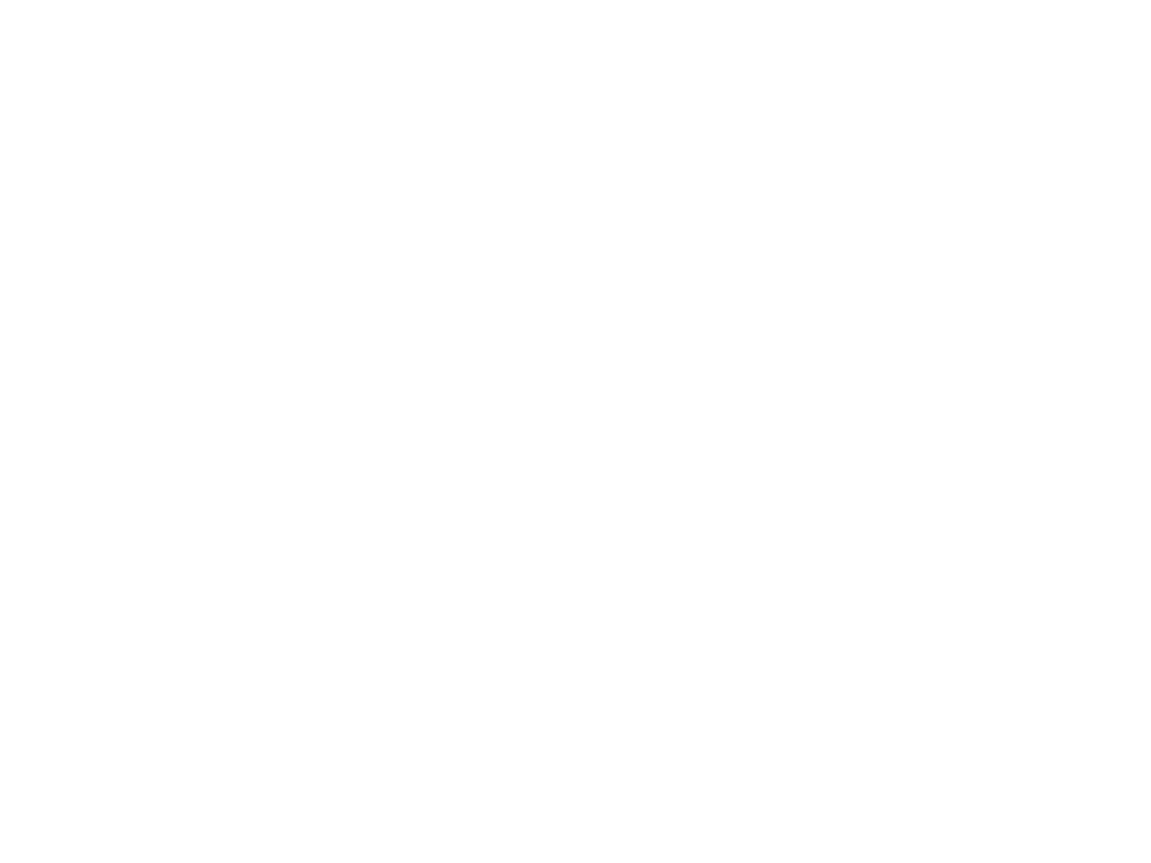

In [6]:
#3d
%matplotlib notebook
import  matplotlib.patches as mpatches
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

output=get_user_target_info(target)
users_target=output[0]
users_target_ind=output[1]
target_fav=output[2]
target_fav_ind=output[3]
target_ag=output[4]
target_ag_ind=output[5]
target_score=output[6]
target_col=output[7]

        
mds_target = MDS(n_components=3, dissimilarity="precomputed", random_state=1)

pos_target = mds_target.fit_transform(dist_user[users_target_ind][:,users_target_ind])  # shape (n_components, n_samples)
xs1, ys1, zs1 = pos_target[:, 0], pos_target[:, 1],pos_target[:,2]


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(xs1, ys1, zs1,c=target_col, alpha=.8)

red_patch = mpatches.Patch(color='r', label='User is against '+target)
green_patch = mpatches.Patch(color='g', label='User is for '+ target)
yellow_patch = mpatches.Patch(color='y', label='User has no stance on '+target)

plt.legend(handles=[red_patch,green_patch,yellow_patch])
#plt.title(target)
ax.set_xlabel('MDS1')
ax.set_ylabel('MDS2')
ax.set_zlabel('MDS3')
if len(selected_users)>0 and target==targets[0]:
    for i in range(len(xs1)):
        if i in selected_users:
            label = '%d'  % (selected_ratings[selected_users.index(i)])
            ax.text(xs1[i],ys1[i],zs1[i],label,weight='bold')
ax.view_init(elev=55, azim=10)
plt.savefig('../../12thGradeSchoolWork/Project/ProjectTexFiles/figures/'+target+'3D',dpi=1200)
#plt.savefig('MDS_figures/'+target+'3D')
plt.show()


<IPython.core.display.Javascript object>


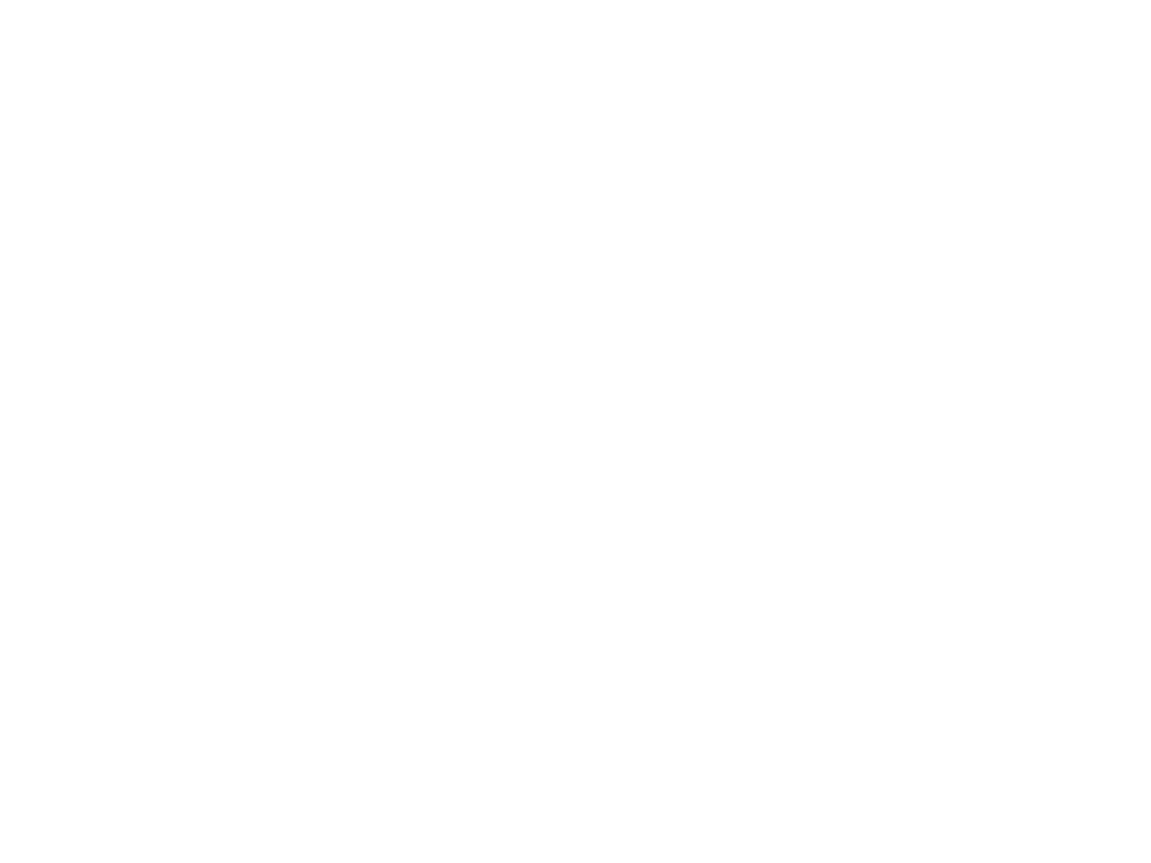

In [7]:
#2d
%matplotlib notebook
import  matplotlib.patches as mpatches
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

output=get_user_target_info(target)
users_target=output[0]
users_target_ind=output[1]
target_fav=output[2]
target_fav_ind=output[3]
target_ag=output[4]
target_ag_ind=output[5]
target_score=output[6]
target_col=output[7]

target_ath = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos_target = mds_target.fit_transform(dist_user[users_target_ind][:,users_target_ind])  # shape (n_components, n_samples)
xs1, ys1 = pos_target[:, 0], pos_target[:, 1]


fig = plt.figure()

plt.scatter(xs1, ys1, c=target_col, alpha=.8)

red_patch = mpatches.Patch(color='r', label='User is against '+target)
green_patch = mpatches.Patch(color='g', label='User is for '+target)
yellow_patch = mpatches.Patch(color='y', label='User has no stance on '+target)

plt.legend(handles=[red_patch,green_patch,yellow_patch])
#plt.title(target)
plt.xlabel('MDS1')
plt.ylabel('MDS2')
if len(selected_users)>0 and target==targets[0]:
    for i in range(len(xs1)):
        if i in selected_users:
     
            label = '%d'  % (selected_ratings[selected_users.index(i)])
            plt.annotate(label,(xs1[i],ys1[i]),weight='bold')
#plt.savefig('../../12thGradeSchoolWork/Project/ProjectTexFiles/figures/'+target+'2D',dpi=1200)
plt.show()

<IPython.core.display.Javascript object>


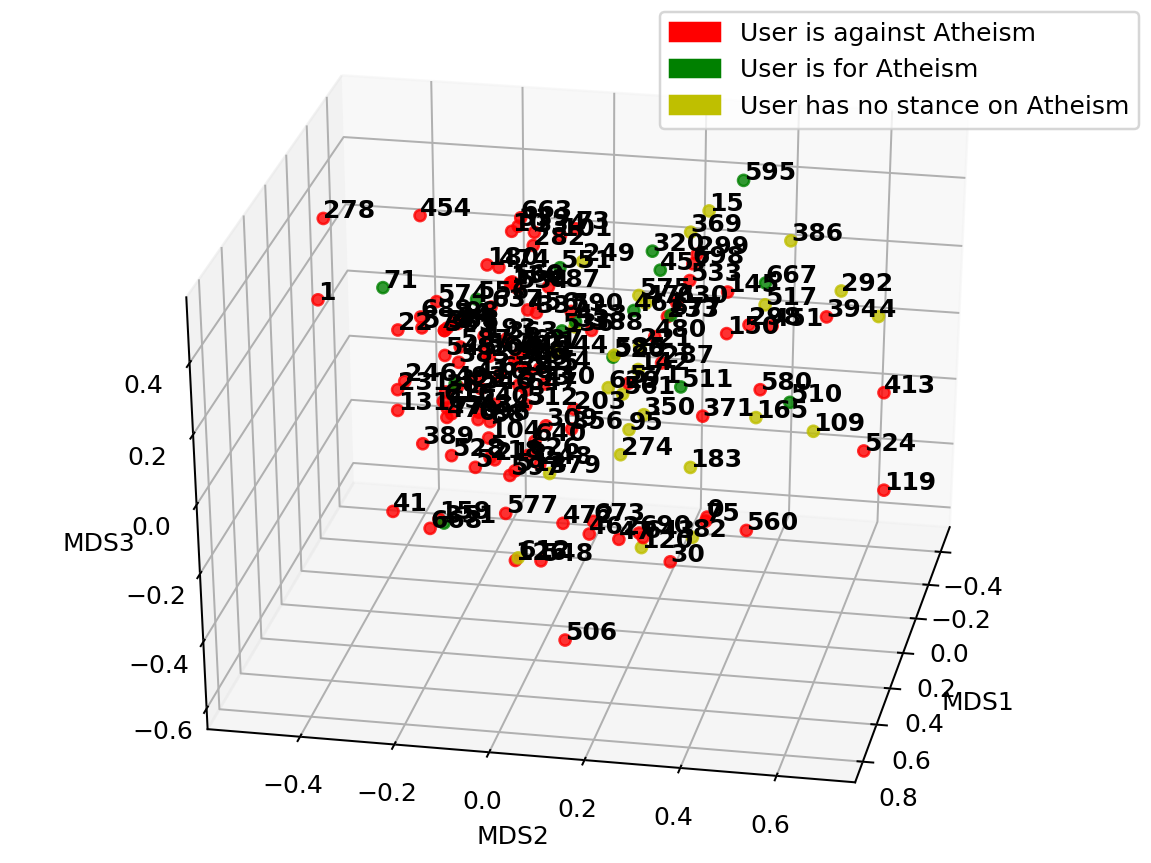

In [8]:
#3d with indices 
%matplotlib notebook
import  matplotlib.patches as mpatches
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

output=get_user_target_info(target)
users_target=output[0]
users_target_ind=output[1]
target_fav=output[2]
target_fav_ind=output[3]
target_ag=output[4]
target_ag_ind=output[5]
target_score=output[6]
target_col=output[7]

        
mds_target = MDS(n_components=3, dissimilarity="precomputed", random_state=1)

pos_target = mds_target.fit_transform(dist_user[users_target_ind][:,users_target_ind])  # shape (n_components, n_samples)
xs1, ys1, zs1 = pos_target[:, 0], pos_target[:, 1],pos_target[:,2]


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(xs1, ys1, zs1,c=target_col, alpha=.8)

red_patch = mpatches.Patch(color='r', label='User is against '+target)
green_patch = mpatches.Patch(color='g', label='User is for '+ target)
yellow_patch = mpatches.Patch(color='y', label='User has no stance on '+target)

plt.legend(handles=[red_patch,green_patch,yellow_patch])
#plt.title(target)
ax.set_xlabel('MDS1')
ax.set_ylabel('MDS2')
ax.set_zlabel('MDS3')

for i in range(len(xs1)):
       
    label = '%d'  % (users_target_ind[i])
    ax.text(xs1[i],ys1[i],zs1[i],label,weight='bold')
ax.view_init(elev=30, azim=11)

plt.show()
